### Predict whether a user clicked on an advertisement
Use metadata about a web user to determine whether or not they clicked on an advertisement

In [1]:
import pandas as pd
import seaborn as sns

### Import data

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Explore data

<AxesSubplot:>

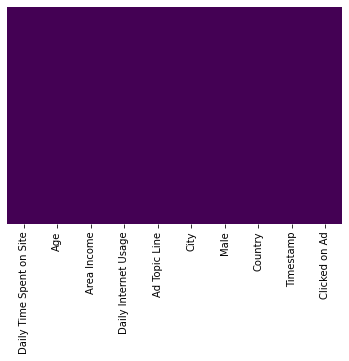

In [3]:
# Check for nulls
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Clicked on Ad'>

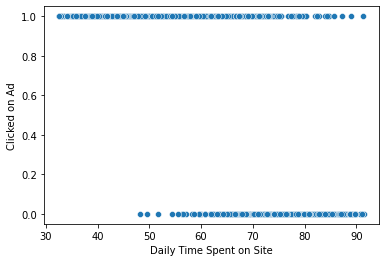

In [8]:
target = 'Clicked on Ad'
# Check relationship between time spent on site and ad click
sns.scatterplot(x='Daily Time Spent on Site', y=target, data=df)

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Clicked on Ad'>

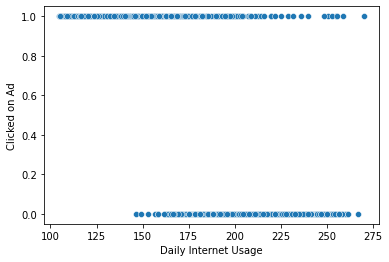

In [9]:
# Check relationship between daily internet usage and ad click
sns.scatterplot(x='Daily Internet Usage', y=target, data=df)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

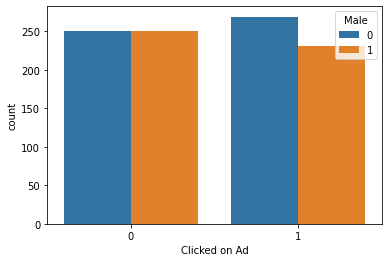

In [10]:
# Check ad clicks by sex
sns.countplot(x=target, hue='Male', data=df)

<AxesSubplot:xlabel='Area Income', ylabel='Clicked on Ad'>

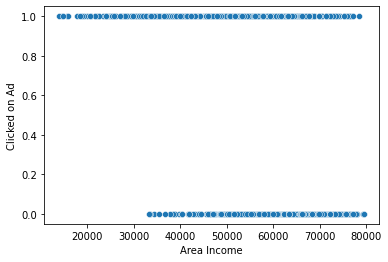

In [11]:
# Check ad clicks by area income
sns.scatterplot(x='Area Income', y=target, data=df)

<AxesSubplot:xlabel='Age', ylabel='Clicked on Ad'>

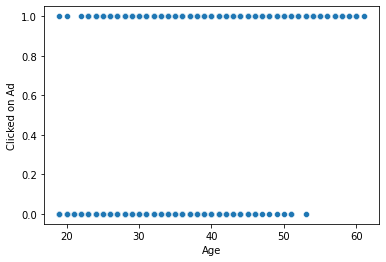

In [12]:
# Check ad clicks by age
sns.scatterplot(x='Age', y=target, data=df)

### Train model

In [15]:
ignore = ['Ad Topic Line', 'City', 'Country', 'Timestamp']
target = 'Clicked on Ad'
feats = [el for el in df.columns if (el not in ignore and el != target)]
X = df[feats]
y = df[target]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Fit model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predictions
preds = model.predict(X_test)

# Generate metrics
from sklearn.metrics import classification_report, confusion_matrix
class_report = classification_report(y_test, preds)
confuse = confusion_matrix(y_test, preds)
print('Classification report:\n', class_report, '\nConfusion matrix:\n', confuse)

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330
 
Confusion matrix:
 [[156   6]
 [ 25 143]]


The model seems to fit well, with precision and recall both right around 0.9. To improve, perhaps we select a subset of featurs and retrain the model to figure out which features most strongly predict whether or not a user clicked an ad.